<a href="https://colab.research.google.com/github/Hanbi-Kim/TextMining/blob/main/Chapter07_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D_%EA%B5%AC%EA%B8%80%EC%BD%94%EB%9E%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/Hanbi-Kim/TextMining/main/dataset/%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4_%EC%82%AC%ED%9A%8C_%EC%9D%B8%EA%B6%8C%EB%B3%B5%EC%A7%80%20.csv",index_col=0)
df

,날짜,헤드라인
0,20220101,새해 첫날 남아공 투투 대주교 장례식 엄수…비오고 맑아 '축복'(종합)
1,20220101,"이준석 ""국민의힘, 동백꽃의 아픔 지닌 분들과 함께할 것""(종합)"
2,20220101,0~9세 코로나 확진자 1주간 4600여명 늘었다…미접종 사각지대 '불안'
3,20220101,고령층 77.2% 3차 접종···3차 접종률은 전체 인구 35.9%
4,20220101,돌파 감염까지…광주서 또다시 외국인 집단감염 기로
...,...,...
10223,20220324,성범죄 피해 청소년 평균 14세…가해자 66%가 지인
10224,20220324,"노인도 '셀프 재택치료'…""응급상황에 중환자들 어쩌나"""
10225,20220324,"""효능 낮아도 처방 대상 넓다"" 먹는 치료제 '라게브리오' 사망 억제할까"
10226,20220324,"[결혼 안 하는 MZ]②""그래 너 알아서하렴""…부모도 독촉 않고 결혼관 존중"


In [12]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [4]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.8 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [5]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [6]:
import konlpy
from konlpy.tag import Okt

#객체 생성
okt = Okt()

In [7]:
text = "okt 형태소 분석기를 사용하여 해당 문장을 분석해봅시다."
okt.pos(text)


[('okt', 'Alpha'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기를', 'Verb'),
 ('사용', 'Noun'),
 ('하여', 'Verb'),
 ('해당', 'Noun'),
 ('문장', 'Noun'),
 ('을', 'Josa'),
 ('분석', 'Noun'),
 ('해봅시다', 'Verb'),
 ('.', 'Punctuation')]

In [8]:
# 명사만 추출하기
okt.nouns(text)

['형태소', '분석', '사용', '해당', '문장', '분석']

In [9]:
# 첫번째 헤드라인
df["헤드라인"].loc[0]

"새해 첫날 남아공 투투 대주교 장례식 엄수…비오고 맑아 '축복'(종합)"

In [10]:
# 첫번째 헤드라인에서 명사만 추출하기
okt.nouns(df["헤드라인"].loc[0])

['새해', '첫날', '남아공', '투투', '대주교', '장례식', '엄수', '축복', '종합']

In [13]:
noun_list = []
for i in range(len(df)):
  noun_list.append(okt.nouns(df["헤드라인"].loc[i]))

In [14]:
total_word = []
for i in range(len(noun_list)):
  for j in range(len(noun_list[i])):
    total_word.append(noun_list[i][j])

In [15]:
len(total_word)

82132

In [16]:
import collections
counter = collections.Counter(total_word)
counter.most_common(30)

[('명', 2848),
 ('확진', 1469),
 ('코로나', 1172),
 ('확', 751),
 ('진자', 720),
 ('신규', 657),
 ('치료', 623),
 ('오미크론', 619),
 ('속보', 602),
 ('지원', 598),
 ('방역', 521),
 ('종합', 507),
 ('검사', 494),
 ('최', 476),
 ('접종', 467),
 ('세', 375),
 ('병원', 369),
 ('포토', 357),
 ('백신', 356),
 ('정부', 356),
 ('차', 345),
 ('증', 345),
 ('감염', 340),
 ('장애인', 332),
 ('역대', 325),
 ('사망', 313),
 ('위중', 309),
 ('누적', 305),
 ('오후', 302),
 ('의료', 301)]

In [17]:
! apt-get update -qq
! apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156786 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [18]:
import matplotlib.font_manager as fm 
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/us

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words = dict(counter.most_common())

wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

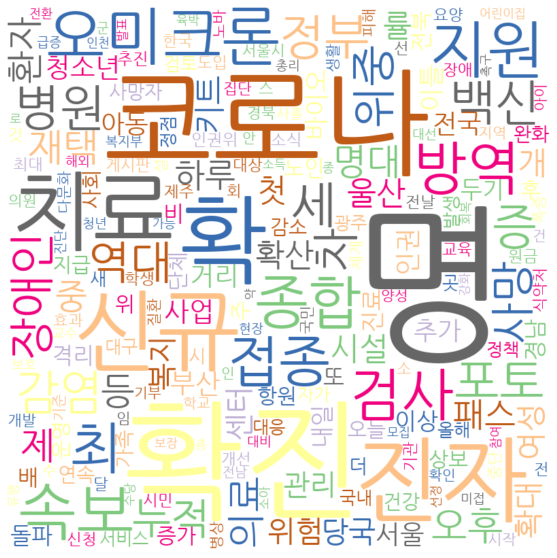

In [20]:
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()